In [4]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import json
from scipy.stats import weibull_min
import autograd.numpy as np
import pandas as pd
plt.style.use('seaborn')

%matplotlib inline

from lifelines import WeibullFitter, KaplanMeierFitter, ExponentialFitter, NelsonAalenFitter
from lifelines.fitters import ParametricUnivariateFitter
from lifelines.utils import restricted_mean_survival_time as rmst, qth_survival_time as qst
from scipy.stats import kstest, cramervonmises, uniform

#custom
from scripts.utils import convert_to_lifetimes

In [5]:
data = json.load(open('data/data.json', 'r'))
alter_names = ['- curcumin', '+ curcumin', '- berberine', '+ berberine', '- SIRT6', '+ SIRT6',
               '- rapamycin', '+ rapamycin', 'PMID: 28877458', 'PMID: 24409289', 'PMID: 28877457',
               'PMID: 32877690', 'PMID: 32934233', 'PMID: 20370440', 'PMID: 35511946']

In [28]:
#get weibull parameters for all data

controls = [
            'Curcumin control',
            # 'Berberine control',
            'Sirtuin control',
            'Rapamycin control',
            'Keto control',
            'Rapamycin2 control',
            'Diet control',
            'AKG control',
            'Frailty control',
            'Chinese control',
            'Circad control'
            ]

name_T = []
control_T = []
df = pd.DataFrame()
for i, (name, experiment) in enumerate(data.items()):
    x = experiment['x']
    y = experiment['y']
    n = experiment['n']
    T = convert_to_lifetimes(x, y, n) 
    if name in controls:
        control_T += T
        name_T += [name] * len(T)
    kf = KaplanMeierFitter().fit(T)
    df = df.append({"name":name, "MedianLifespan":kf.median_survival_time_}, ignore_index=True)
kfm = KaplanMeierFitter().fit(control_T)
df = df.append({"name":'Meta control', "MedianLifespan":kfm.median_survival_time_}, ignore_index=True)

In [30]:
from lifelines.datasets import load_rossi
load_rossi()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...
427,52,0,1,31,0,1,0,1,3
428,52,0,0,20,1,0,0,1,1
429,52,0,1,20,1,1,1,1,1
430,52,0,0,29,1,1,0,1,3


,name_AKG control,name_Chinese control,name_Circad control,name_Curcumin control,name_Diet control,name_Frailty control,name_Keto control,name_Rapamycin control,name_Rapamycin2 control,name_Sirtuin control
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
396,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
pdat.drop('name',axis=1)

,T
0,549.449875
1,580.039850
2,580.039850
3,580.039850
4,670.280200
...,...
396,1001.298700
397,1058.766230
398,1067.532470
399,1103.571430


In [72]:
from lifelines import CoxPHFitter



pdat = pd.DataFrame({'T':control_T, 'name':name_T})
from sklearn.preprocessing import OneHotEncoder
hot = OneHotEncoder()
tr = hot.fit_transform(pdat[['name']]).todense()
pdat = pdat.drop('name', axis=1).join(pd.DataFrame(tr, columns=hot.get_feature_names_out()))


cph = CoxPHFitter(penalizer=1)
cph.fit(pdat, 'T', robust=True)
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 401 total observations, 0 right-censored observations>
             duration col = 'T'
                penalizer = 1
                 l1 ratio = 0.0
          robust variance = True
      baseline estimation = breslow
   number of observations = 401
number of events observed = 401
   partial log-likelihood = -1989.28
         time fit was run = 2023-07-06 14:41:34 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
name_AKG control         -0.33       0.72       0.08            -0.48            -0.17                 0.62                 0.84
name_Chinese control      0.23       1.26       0.06             0.11             0.35                 1.12                 1.42
name_Circad control       0.10       1.11       0.09            -0.06             0.27                 0.94                 1.31
name_Curcumin control     0.11       1.12       0.06            -0.00             0.22                 1.00                 1.25
name_Diet control        -0.18       0.83       0.08            -0.34            -0.02                 0.71                 0.98
name_Frailty control     -0.33       0.72       0.10            -0.51            -0.14                 0.60                 0.87
name_Keto control        -0.17       0.85       0.06            -0.28            -0.05                 0.75                 0.95
name_Rapamycin control   -0.37       0.69       0.15            -0.66            -0.08                 0.52                 0.93
name_Rapamycin2 control   0.16       1.17       0.06             0.04             0.28                 1.04                 1.33
name_Sirtuin control      0.26       1.29       0.08             0.11             0.41                 1.11                 1.50

                          cmp to     z      p   -log2(p)
covariate                                               
name_AKG control            0.00 -4.10 <0.005      14.58
name_Chinese control        0.00  3.85 <0.005      13.08
name_Circad control         0.00  1.21   0.23       2.14
name_Curcumin control       0.00  1.91   0.06       4.17
name_Diet control           0.00 -2.25   0.02       5.35
name_Frailty control        0.00 -3.41 <0.005      10.57
name_Keto control           0.00 -2.80   0.01       7.59
name_Rapamycin control      0.00 -2.47   0.01       6.20
name_Rapamycin2 control     0.00  2.52   0.01       6.39
name_Sirtuin control        0.00  3.38 <0.005      10.44
---
Concordance = 0.63
Partial AIC = 3998.57
log-likelihood ratio test = 34.42 on 10 df
-log2(p) of ll-ratio test = 12.64

In [12]:
df[['Treatment', 'Type']] = df['name'].str.split(' ', expand=True)

In [13]:
lbls = df[df['Type'] == 'control'].iloc[:4]['Treatment'].values
control = df[df['Type'] == 'control'].iloc[:4]['MedianLifespan'].values
effect = df[df['Type'] == 'experiment']['MedianLifespan'].values - control
effect = effect/control * 100

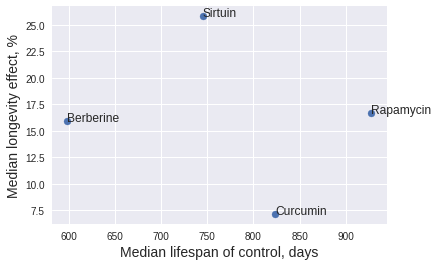

In [14]:
ax = plt.scatter(control, effect)
plt.xlabel('Median lifespan of control, days', fontsize=14)
plt.ylabel('Median longevity effect, %', fontsize=14)

# Annotation
for l, x, y in zip(lbls, control, effect):
    plt.annotate(l, xy =(x, y), fontsize=12)

In [16]:
df

,name,MedianLifespan,Treatment,Type
0,Curcumin control,823.230075,Curcumin,control
1,Curcumin experiment,882.115815,Curcumin,experiment
2,Berberine control,598.310810,Berberine,control
3,Berberine experiment,693.693690,Berberine,experiment
4,Sirtuin control,745.038170,Sirtuin,control
5,Sirtuin experiment,937.404580,Sirtuin,experiment
6,Rapamycin control,927.659570,Rapamycin,control
7,Rapamycin experiment,1082.591090,Rapamycin,experiment
8,Keto control,901.631240,Keto,control
9,Rapamycin2 control,804.540590,Rapamycin2,control


In [22]:
meta_control = df[df['Treatment'] == 'Meta']['MedianLifespan'].item()
meta_effect = (df[df['Type'] == 'experiment']['MedianLifespan'].values - 
               meta_control)
meta_effect = meta_effect/meta_control * 100

Text(0, 0.5, 'Median longevity effect, %')

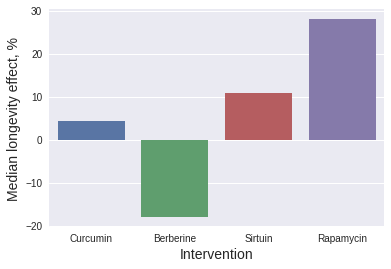

In [27]:
sns.barplot(lbls, meta_effect)
plt.xlabel('Intervention', fontsize=14)
plt.ylabel('Median longevity effect, %', fontsize=14)